In [1]:
import pandas as pd
# HRV only DWS N2
raw_df = pd.read_csv('./features_data_resample/HRV_only_dws_N2.csv')
raw_label = pd.read_csv('./features_data_resample/HRV_only_dws_N2_label.csv') 
# # HRV& PHI only
# raw_df = pd.read_csv('./features_data_resample/HRV&PHI_only_dws_N2.csv')
# raw_label = pd.read_csv('./features_data_resample/HRV&PHI_only_dws_N2_label.csv') 
# # Taken & PCA
# raw_df = pd.read_csv('./features_data_resample/HRV_Takens&pca.csv')
# raw_label = pd.read_csv('./features_data_resample/HRV_Takens&pca_label.csv')
# # Original featuers
#raw_df = pd.read_csv('./features_data_resample/HRV_Original.csv')
#raw_label = pd.read_csv('./features_data_resample/HRV_Original_label.csv')
X = raw_df
y = raw_label
print(y.shape,X.shape)

(9155, 1) (9155, 149)


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


X_train: (6408, 149)
X_test: (2747, 149)


In [ ]:
# Do leave-one-subject-out


In [3]:
import lightgbm as lgb
model = lgb.LGBMClassifier(is_unbalance=False)
model.fit(X_train,y_train)

d:\miniconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\miniconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(is_unbalance=False)

In [4]:
from sklearn.metrics import accuracy_score
pred=model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred))

Accuracy: 0.8005096468875137


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_confusion_matrix(actual_val, pred_val, title=None):
    confusion_matrix = pd.crosstab(actual_val, pred_val,
                                   rownames=['Actual'],
                                   colnames=['Predicted'])
    
    plot = sns.heatmap(confusion_matrix, annot=True, fmt=',.0f')
    
    if title is None:
        pass
    else:
        plot.set_title(title)
        
    plt.show()
    return confusion_matrix

In [6]:
import numpy as np
q = np.array(y_test)
q = q.reshape((-1,))
print(q.shape)
print(pred.shape)

(2747,)
(2747,)


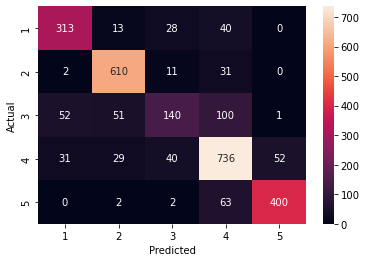

In [7]:
plot_confusion_matrix(q, pred)